In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import math

from sklearn.preprocessing import StandardScaler, scale

In [7]:
df = pd.read_csv('data/Absenteeism_at_work.csv', delimiter=';')
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [8]:
df.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [9]:
df = df[[
    'Transportation expense',
    'Distance from Residence to Work',
    'Service time',
    'Age',
    'Work load Average/day ',
    'Weight',
    'Height',
    'Body mass index',
    'Absenteeism time in hours'
]]

In [10]:
df.rename(columns={
    'Transportation expense': 'Transportation',
    'Distance from Residence to Work': 'Distance',
    'Service time': 'Service',
    'Work load Average/day ': 'Workload',
    'Body mass index': 'BMI',
    'Absenteeism time in hours': 'AbsentHours'
    }, inplace=True)

In [11]:
df.columns

Index(['Transportation', 'Distance', 'Service', 'Age', 'Workload', 'Weight',
       'Height', 'BMI', 'AbsentHours'],
      dtype='object')

In [12]:
df = df.astype(np.float64)

In [13]:
df.describe()

,Transportation,Distance,Service,Age,Workload,Weight,Height,BMI,AbsentHours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,221.329730,29.631081,12.554054,36.450000,271.490235,79.035135,172.114865,26.677027,6.924324
std,66.952223,14.836788,4.384873,6.478772,39.058116,12.883211,6.034995,4.285452,13.330998
min,118.000000,5.000000,1.000000,27.000000,205.917000,56.000000,163.000000,19.000000,0.000000
25%,179.000000,16.000000,9.000000,31.000000,244.387000,69.000000,169.000000,24.000000,2.000000
50%,225.000000,26.000000,13.000000,37.000000,264.249000,83.000000,170.000000,25.000000,3.000000
75%,260.000000,50.000000,16.000000,40.000000,294.217000,89.000000,172.000000,31.000000,8.000000
max,388.000000,52.000000,29.000000,58.000000,378.884000,108.000000,196.000000,38.000000,120.000000


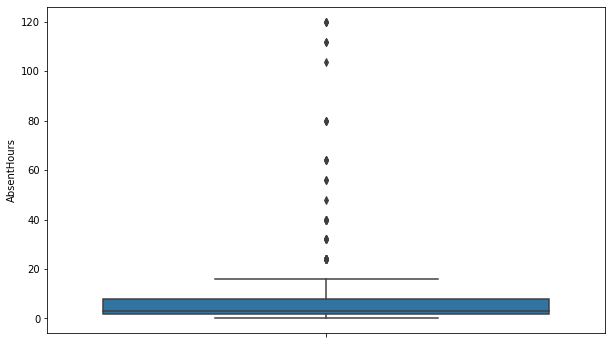

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['AbsentHours']);

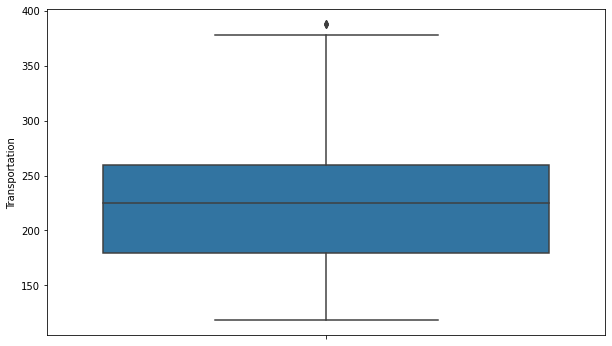

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['Transportation']);

In [16]:
df.to_csv('data/absenteeism_preprocessed.csv', index=False)

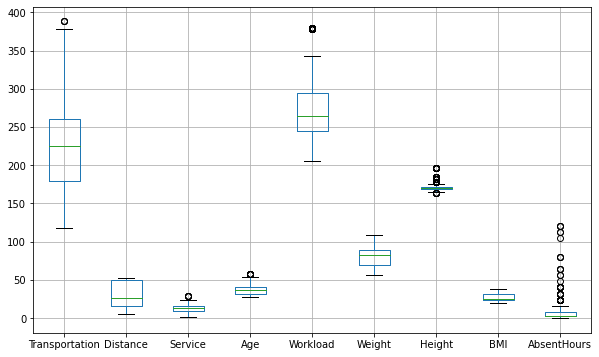

In [17]:
df.boxplot(figsize=(10, 6));

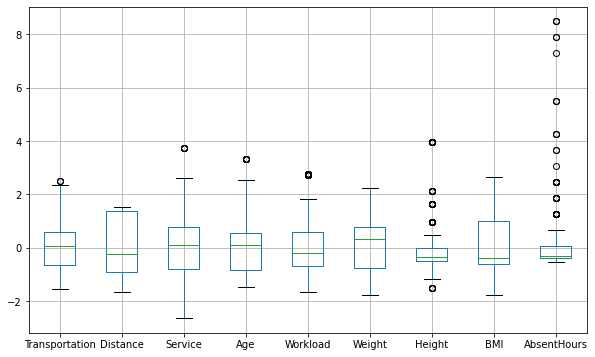

In [18]:
scaler = StandardScaler(copy=True, with_mean=True, with_std=True) # Data is scaled to have zero mean and unit variance 
scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
scaled_df.boxplot(figsize=(10, 6));

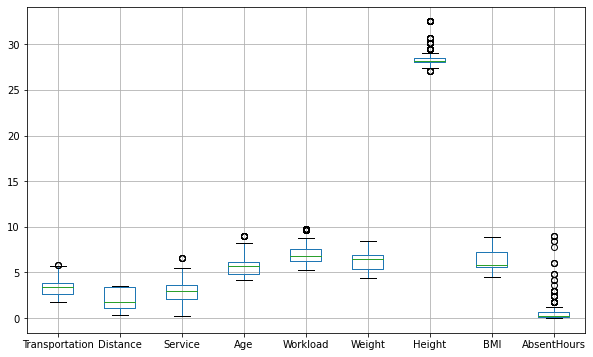

In [19]:
std_scaler = StandardScaler(copy=True, with_mean=False, with_std=True) # Data is not centered to mean of zero but still has unit variance
std_scaled_df = pd.DataFrame(std_scaler.fit_transform(df), columns=df.columns)
std_scaled_df.boxplot(figsize=(10, 6));

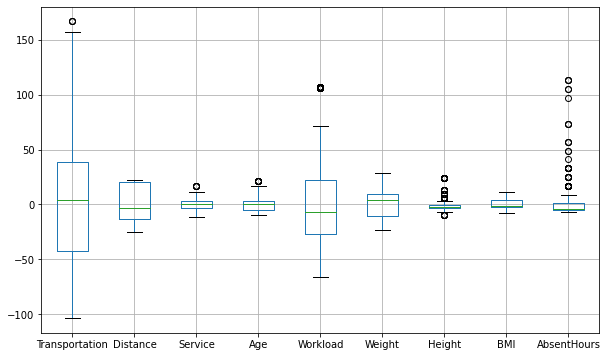

In [20]:
mean_scaler = StandardScaler(copy=True, with_mean=True, with_std=False) # Data is centered to mean of zero but not scaled to unit variance
mean_scaled_df = pd.DataFrame(mean_scaler.fit_transform(df), columns=df.columns)
mean_scaled_df.boxplot(figsize=(10, 6));

In [21]:
print('Scaler properties:')
print('Mean: ', scaler.mean_)
print('Std: ', scaler.scale_)
print('Variance: ', scaler.var_)
print('Samples seen: ', scaler.n_samples_seen_)

Scaler properties:
Mean:  [221.32972973  29.63108108  12.55405405  36.45       271.49023514
  79.03513514 172.11486486  26.67702703   6.92432432]
Std:  [66.90696996 14.82676019  4.38190965  6.47439343 39.03171665 12.87450269
  6.03091545  4.28255567 13.32198762]
Variance:  [4476.54262966  219.83281775   19.20113221   41.91777027 1523.47490444
  165.75281958   36.3719412    18.34028305  177.47535427]
Samples seen:  740


In [22]:
# RobustScaler is less sensitive to outliers as it uses median and quartiles instead of mean and standard deviation
from sklearn.preprocessing import RobustScaler

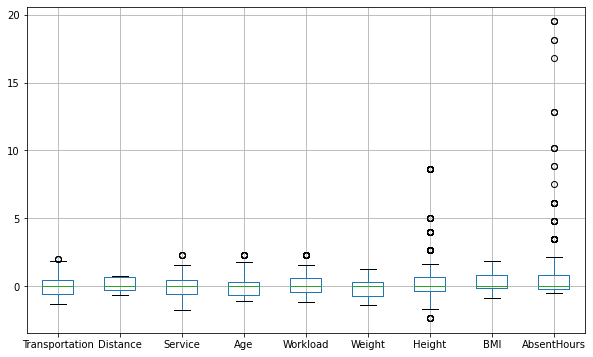

In [23]:
robust_scaler = RobustScaler(copy=True, quantile_range=(25, 75), with_centering=True, with_scaling=True)
robust_scaled_df = pd.DataFrame(robust_scaler.fit_transform(df), columns=df.columns)
robust_scaled_df.boxplot(figsize=(10, 6));

In [24]:
# Normalization scales each observation to have unit norm
from sklearn.preprocessing import Normalizer
from sklearn.metrics.pairwise import cosine_similarity

In [25]:
driver_df = pd.read_csv('data/data_1024.csv', delimiter='\t')
driver_df.head()

,Driver_ID,Distance_Feature,Speeding_Feature
0,3423311935,71.24,28.0
1,3423313212,52.53,25.0
2,3423313724,64.54,27.0
3,3423311373,55.69,22.0
4,3423310999,54.58,25.0


In [26]:
driver_df = driver_df[['Distance_Feature', 'Speeding_Feature']]

In [27]:
driver_df.describe()

,Distance_Feature,Speeding_Feature
count,4000.000000,4000.000000
mean,76.041523,10.721000
std,53.469563,13.708543
min,15.520000,0.000000
25%,45.247500,4.000000
50%,53.330000,6.000000
75%,65.632500,9.000000
max,244.790000,100.000000


In [28]:
driver_df = driver_df.astype(np.float32)

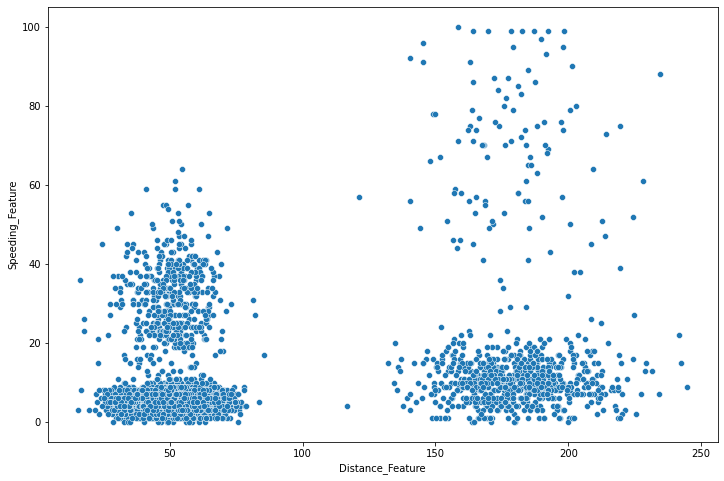

In [29]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(x='Distance_Feature', y='Speeding_Feature', data=driver_df);

In [30]:
cosine_similarity(driver_df)

array([[1.0000001 , 0.99757147, 0.9997639 , ..., 0.9540292 , 0.9406991 ,
        0.94892687],
       [0.99757147, 1.0000001 , 0.99884933, ..., 0.9308368 , 0.914786  ,
        0.92464775],
       [0.9997639 , 0.99884933, 0.99999994, ..., 0.94729143, 0.9331056 ,
        0.9418475 ],
       ...,
       [0.9540292 , 0.9308368 , 0.94729143, ..., 0.99999994, 0.9991299 ,
        0.9998624 ],
       [0.9406991 , 0.914786  , 0.9331056 , ..., 0.9991299 , 0.99999994,
        0.99968415],
       [0.94892687, 0.92464775, 0.9418475 , ..., 0.9998624 , 0.99968415,
        0.9999999 ]], dtype=float32)

In [31]:
normalized_df = pd.DataFrame(Normalizer(norm='l2').fit_transform(driver_df), columns=driver_df.columns)

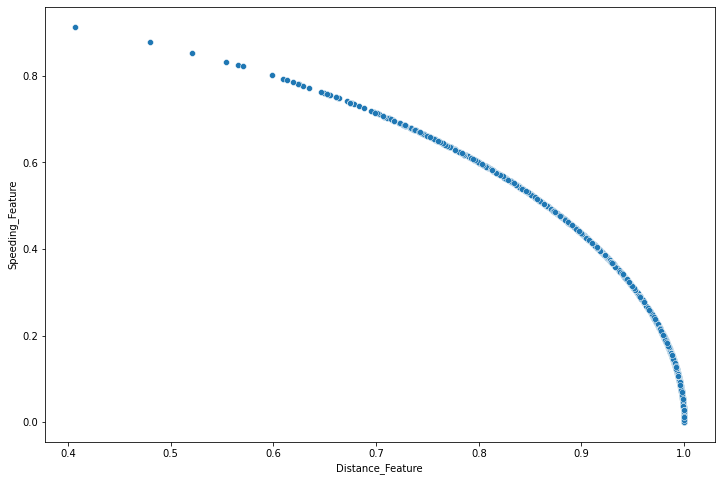

In [32]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Distance_Feature', y='Speeding_Feature', data=normalized_df);

In [33]:
normalized_df['magnitude'] = normalized_df.apply(lambda x: np.sqrt(x[0]**2 + x[1]**2), axis=1)
normalized_df.head(10)

,Distance_Feature,Speeding_Feature,magnitude
0,0.930694,0.365798,1.0
1,0.902956,0.429733,1.0
2,0.922526,0.385934,1.0
3,0.930058,0.367414,1.0
4,0.909165,0.416437,1.0
5,0.972694,0.232091,1.0
6,0.946465,0.322805,1.0
7,0.988380,0.152000,1.0
8,0.676705,0.736255,1.0
9,0.919070,0.394095,1.0


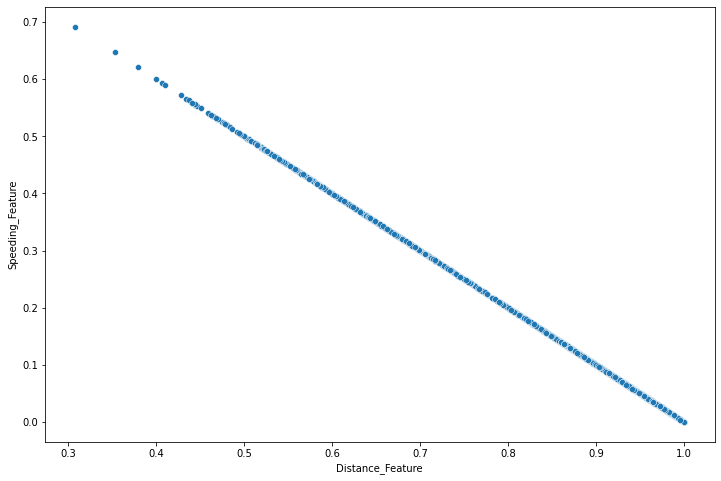

In [39]:
l1_norm_df = pd.DataFrame(Normalizer(norm='l1').fit_transform(driver_df), columns=driver_df.columns)
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Distance_Feature', y='Speeding_Feature', data=l1_norm_df);

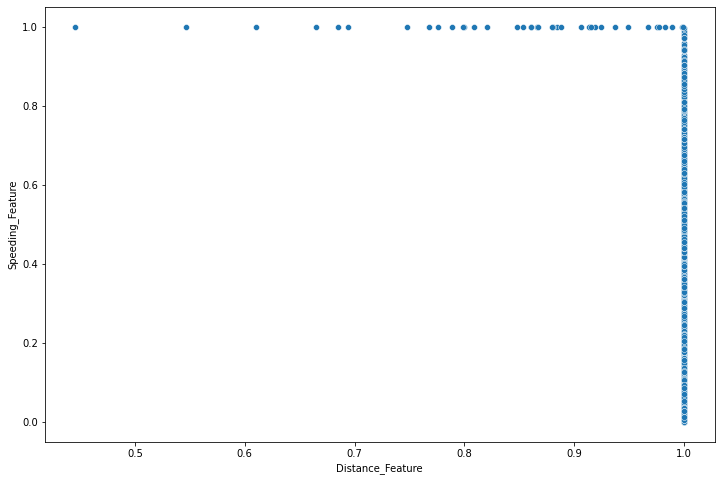

In [40]:
max_norm_df = pd.DataFrame(Normalizer(norm='max').fit_transform(driver_df), columns=driver_df.columns)
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Distance_Feature', y='Speeding_Feature', data=max_norm_df);

In [41]:
# Binarization transforms each feature to have a binary value of 0 or 1 based on a threshold
from sklearn.preprocessing import Binarizer

In [42]:
num_list = [[-1000, 0],
            [500, -3000],
            [100, 650]]

In [47]:
binarizer = Binarizer(threshold=0)
binarized_df = pd.DataFrame(binarizer.fit_transform(num_list), columns=['Bin1', 'Bin2'])
binarized_df.head()

,Bin1,Bin2
0,0,0
1,1,0
2,1,1


In [48]:
binarizer = Binarizer(threshold=[0, 100]) # Thresholds are specified as a list for indiviual features
binarized_df = pd.DataFrame(binarizer.fit_transform(num_list), columns=['Bin1', 'Bin2'])
binarized_df.head()

,Bin1,Bin2
0,0,0
1,1,0
2,1,1


In [49]:
# KBinsDiscretizer transforms each feature to have a discrete value based on a number of bins
from sklearn.preprocessing import KBinsDiscretizer

In [50]:
marks = pd.read_csv('data/student_performance.csv')
marks.head()

,Hours Studied,Score Obtained,Outliers
0,22,0.869736,False
1,26,0.912112,False
2,45,1.143020,False
3,46,1.156660,False
4,50,1.212843,False


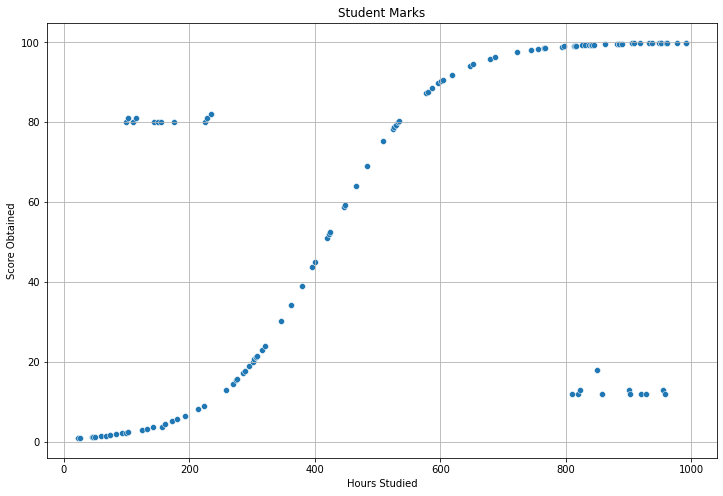

In [51]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(x='Hours Studied', y='Score Obtained', data=marks)
ax.set(xlabel='Hours Studied', ylabel='Score Obtained', title='Student Marks')
ax.grid()
plt.show();

In [53]:
k_bins = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
marks_binned = pd.DataFrame(k_bins.fit_transform(marks[['Hours Studied', 'Score Obtained']]), columns=['Hours_binned', 'Score_binned'])
marks_binned.head()

,Hours_binned,Score_binned
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


In [55]:
student_kbins = pd.concat([marks, marks_binned], axis=1)
student_kbins.head()

,Hours Studied,Score Obtained,Outliers,Hours_binned,Score_binned
0,22,0.869736,False,0.0,0.0
1,26,0.912112,False,0.0,0.0
2,45,1.143020,False,0.0,0.0
3,46,1.156660,False,0.0,0.0
4,50,1.212843,False,0.0,0.0


In [56]:
hours_edges = k_bins.bin_edges_[0]
marks_edges = k_bins.bin_edges_[1]
marks_edges, hours_edges

(array([ 0.8697363 , 33.87973234, 66.88972838, 99.89972442]),
 array([ 22.        , 345.33333333, 668.66666667, 992.        ]))

In [57]:
from sklearn.preprocessing import MaxAbsScaler, MinMaxScaler

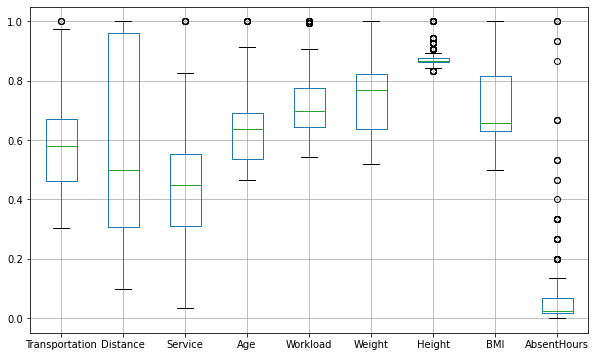

In [58]:
scaled_df = pd.DataFrame(MaxAbsScaler().fit_transform(df), columns=df.columns)
scaled_df.boxplot(figsize=(10, 6));

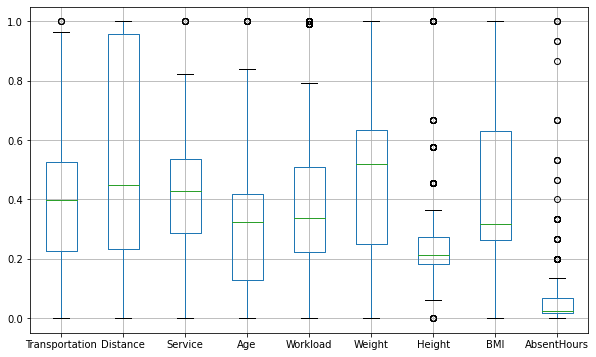

In [59]:
scaled_df = pd.DataFrame(MinMaxScaler().fit_transform(df), columns=df.columns)
scaled_df.boxplot(figsize=(10, 6));

In [60]:
# FunctionTransformer can be used to apply a custom function to each observation
from sklearn.preprocessing import FunctionTransformer

In [61]:
arr = np.array([[0, -1],
                [-6, 7]])
arr

array([[ 0, -1],
       [-6,  7]])

In [62]:
abs_transformer = FunctionTransformer(np.abs, validate=False) # Validate=True converts the input to a numpy array
abs_transformer.fit_transform(arr)

array([[0, 1],
       [6, 7]])

In [63]:
def calculate_square(x):
    return x**2

square_transformer = FunctionTransformer(calculate_square, validate=False)
square_transformer.fit_transform(arr)

array([[ 0,  1],
       [36, 49]], dtype=int32)

In [66]:
inverse_transformer = FunctionTransformer(inverse_func=np.sqrt, validate=False)
inverse_transformer.inverse_transform(square_transformer.transform(arr))

array([[0., 1.],
       [6., 7.]])

In [67]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [68]:
def poly_func(x):
    return 5*x**3 + 3*x**2 + 2*x + 15

In [85]:
np.random.seed(42)
n_samples = 300
degree = 3
X = np.sort(np.random.rand(n_samples))
y = X.reshape(-1, 1)
y = poly_func(X) + np.random.randn(n_samples) * 0.1

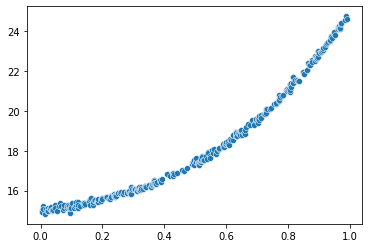

In [86]:
sns.scatterplot(x=X, y=y);

In [87]:
lr = LinearRegression().fit(X.reshape(-1, 1), y)
y_pred = lr.predict(X.reshape(-1, 1))

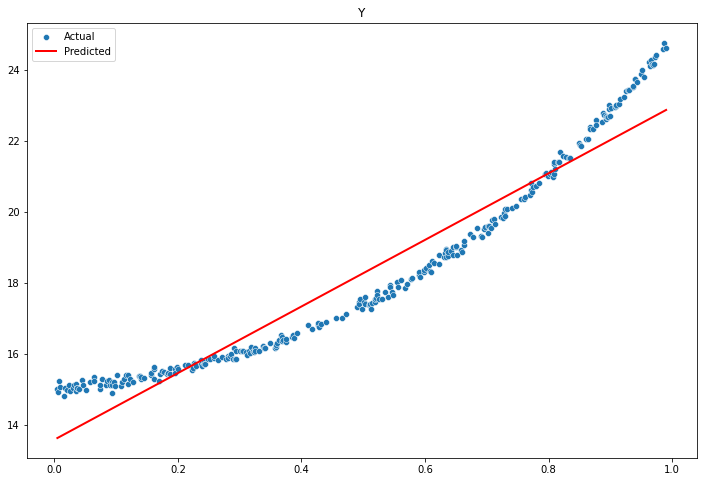

In [88]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(x=X, y=y, ax=ax, label='Actual');
ax.plot(X, y_pred, color='red', linewidth=2, label='Predicted')
plt.title('Y')
plt.legend();

In [90]:
# PolynomialFeatures generates a new feature matrix with the polynomial terms
poly_features = PolynomialFeatures(degree=3, include_bias=True) # include_bias=True adds a constant column to the features

In [92]:
poly_features.fit_transform(X.reshape(-1, 1))

array([[1.00000000e+00, 5.06158385e-03, 2.56196310e-05, 1.29675911e-07],
       [1.00000000e+00, 5.52211712e-03, 3.04937775e-05, 1.68390211e-07],
       [1.00000000e+00, 6.95213053e-03, 4.83321189e-05, 3.36011200e-07],
       ...,
       [1.00000000e+00, 9.85650454e-01, 9.71506818e-01, 9.57566136e-01],
       [1.00000000e+00, 9.86886937e-01, 9.73945826e-01, 9.61174412e-01],
       [1.00000000e+00, 9.90053850e-01, 9.80206626e-01, 9.70457344e-01]])

In [93]:
lr = LinearRegression()
pipeline = Pipeline([
    ('poly_features', poly_features),
    ('linear_regression', lr)
])

In [94]:
pipeline.fit(X.reshape(-1, 1), y)
y_pred = pipeline.predict(X.reshape(-1, 1))

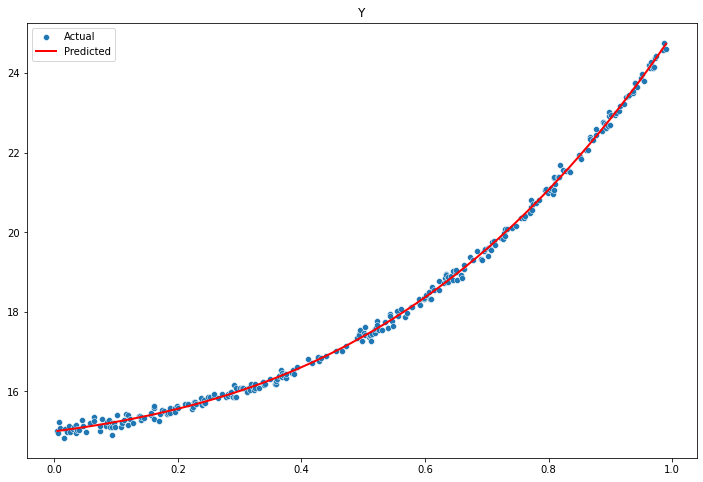

In [95]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(x=X, y=y, ax=ax, label='Actual');
ax.plot(X, y_pred, color='red', linewidth=2, label='Predicted')
plt.title('Y')
plt.legend();

In [96]:
# Powertransformer can be used to transform feature as close to Gaussian distribution as possible
from sklearn.preprocessing import PowerTransformer

In [97]:
analyst_data = pd.read_csv('data/Analyst_Forecasts.csv')
analyst_data.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Votes
0,-1.388211,-1.389959,0.347923,-0.052494,-0.202153,0.057804,1.183421,0.183474,550
1,0.456374,1.095764,0.463571,0.905927,0.249351,0.081663,-0.550198,-0.495891,670
2,0.003587,-0.420926,-1.600987,0.028840,1.105627,0.739811,-0.975828,-0.519515,546
3,-1.284997,-0.063613,-1.161092,0.685333,-1.701926,1.942891,-0.780951,-1.231096,400
4,-0.179291,0.309389,0.624467,-1.374801,0.689295,-0.194378,-1.406515,0.461056,572


In [98]:
X = analyst_data.drop(columns='Votes')
y = analyst_data['Votes']

In [99]:
y.describe()

count    1000.000000
mean      500.013000
std       100.042408
min       155.000000
25%       435.000000
50%       500.000000
75%       568.000000
max       797.000000
Name: Votes, dtype: float64

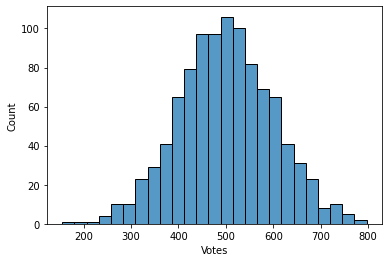

In [100]:
sns.histplot(y);

In [101]:
analyst_data['Variability'] = analyst_data.drop(columns='Votes').var(axis=1)
analyst_data.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Votes,Variability
0,-1.388211,-1.389959,0.347923,-0.052494,-0.202153,0.057804,1.183421,0.183474,550,0.751824
1,0.456374,1.095764,0.463571,0.905927,0.249351,0.081663,-0.550198,-0.495891,670,0.350491
2,0.003587,-0.420926,-1.600987,0.028840,1.105627,0.739811,-0.975828,-0.519515,546,0.771014
3,-1.284997,-0.063613,-1.161092,0.685333,-1.701926,1.942891,-0.780951,-1.231096,400,1.522004
4,-0.179291,0.309389,0.624467,-1.374801,0.689295,-0.194378,-1.406515,0.461056,572,0.709765


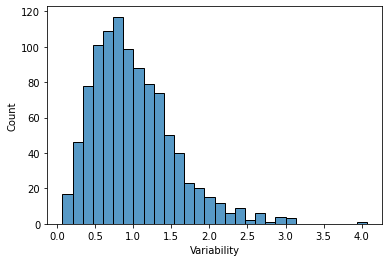

In [102]:
sns.histplot(analyst_data['Variability']);

In [103]:
lr = LinearRegression().fit(X, y)
lr.score(X, y)

0.008116291372005646

In [104]:
y_pred = lr.predict(X)
results_df = pd.DataFrame({'Actual': y, 'Predicted': y_pred})
results_df.head()

,Actual,Predicted
0,550,494.619586
1,670,503.899640
2,546,510.953328
3,400,502.212805
4,572,496.418362


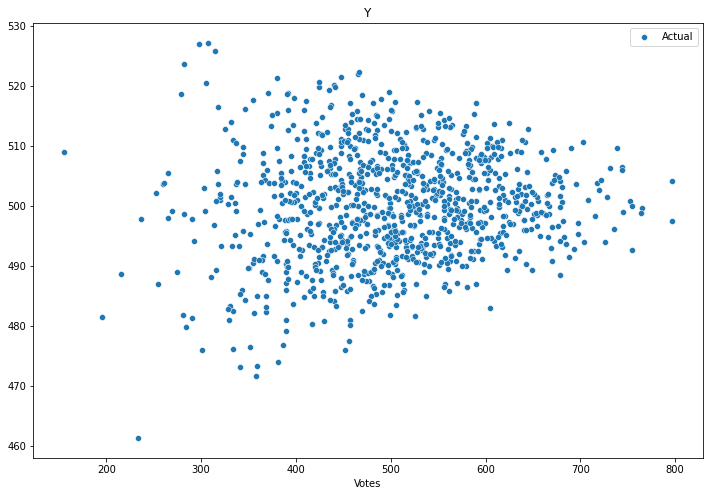

In [105]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(x=y, y=y_pred, ax=ax, label='Actual');
plt.title('Y')
plt.legend();

In [106]:
X_chi_sq = analyst_data[['Variability']]
X_chi_sq.head()

,Variability
0,0.751824
1,0.350491
2,0.771014
3,1.522004
4,0.709765


In [107]:
lr = LinearRegression().fit(X_chi_sq, y)
lr.score(X_chi_sq, y)

0.8235782818542252

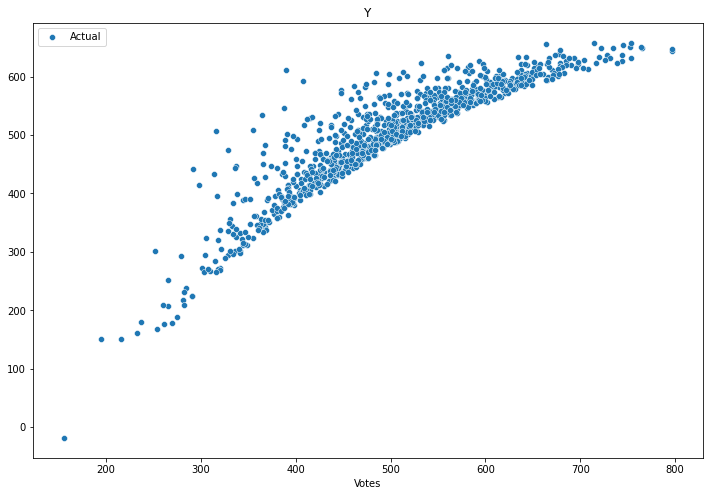

In [108]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(x=y, y=lr.predict(X_chi_sq), ax=ax, label='Actual');
plt.title('Y')
plt.legend();

In [110]:
power_transformer = PowerTransformer(method='box-cox', standardize=True)
X_transformed = power_transformer.fit_transform(X_chi_sq)

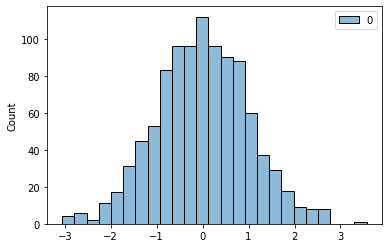

In [111]:
sns.histplot(X_transformed);

0.862049887073391


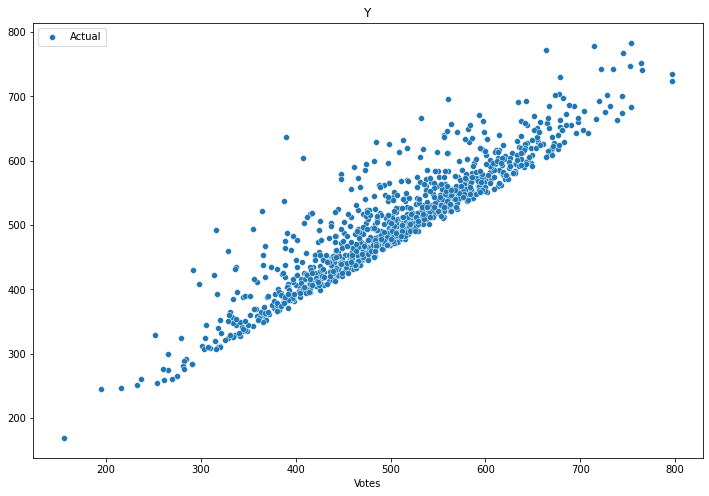

In [112]:
lr = LinearRegression().fit(X_transformed, y)
print(lr.score(X_transformed, y))

fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(x=y, y=lr.predict(X_transformed), ax=ax, label='Actual');
plt.title('Y')
plt.legend();

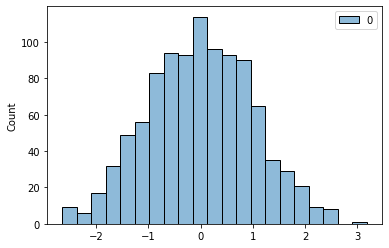

In [113]:
power_transformer = PowerTransformer(method='yeo-johnson', standardize=True)
X_transformed = power_transformer.fit_transform(X_chi_sq)
sns.histplot(X_transformed);

0.8615349517506922


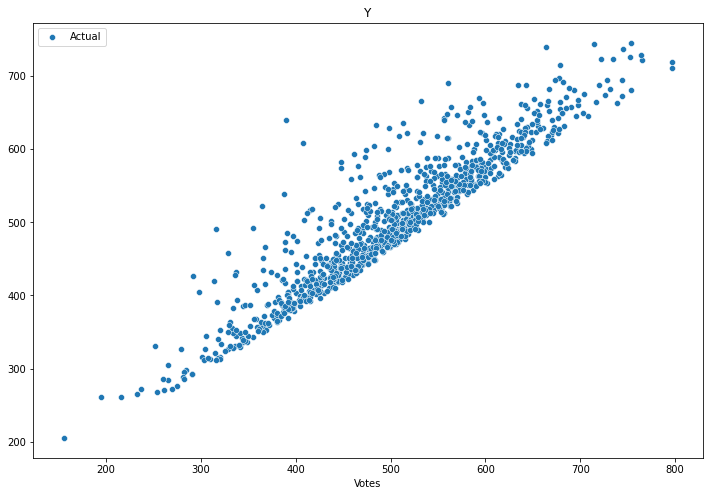

In [114]:
lr = LinearRegression().fit(X_transformed, y)
print(lr.score(X_transformed, y))

fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(x=y, y=lr.predict(X_transformed), ax=ax, label='Actual');
plt.title('Y')
plt.legend();

In [116]:
# QuantileTransformer can be used to transform features as close to a uniform or normal distribution as possible
# It is non-linear transformation and might distort correlations and linear relationships
# It also reduces the impact of outliers
from sklearn.preprocessing import QuantileTransformer

In [117]:
sns.set(color_codes=True)

In [119]:
store_visits = pd.read_csv('data/Store_Visits.csv')
store_visits.head()

,Visits,Revenue,StoreID
0,1023.178663,5165.893314,1
1,1058.607260,5349.036298,1
2,935.069491,4756.347453,1
3,952.360965,4849.804826,1
4,1078.384010,5467.920052,1


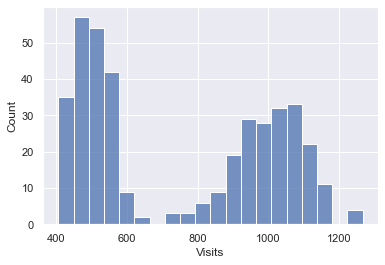

In [121]:
sns.histplot(store_visits['Visits'], bins=20);

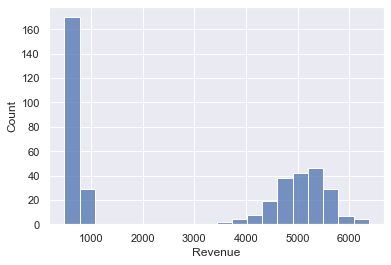

In [122]:
sns.histplot(store_visits['Revenue'], bins=20);

In [123]:
transformer = QuantileTransformer(output_distribution='normal')
X_transformed = transformer.fit_transform(store_visits[['Visits', 'Revenue']])

C:\Users\Safiuddin\anaconda3\envs\tfenv\lib\site-packages\sklearn\preprocessing\_data.py:2590: UserWarning: n_quantiles (1000) is greater than the total number of samples (398). n_quantiles is set to n_samples.
  warnings.warn(


In [124]:
store_transform = pd.DataFrame(X_transformed, columns=['Visits_transform', 'Revenue_transform'])
store_transform.head()

,Visits_transform,Revenue_transform
0,0.692434,0.733135
1,0.989501,0.989501
2,0.317809,0.337797
3,0.371416,0.433038
4,1.208903,1.235553


In [125]:
final_df = pd.concat([store_visits, store_transform], axis=1)
final_df.head()

,Visits,Revenue,StoreID,Visits_transform,Revenue_transform
0,1023.178663,5165.893314,1,0.692434,0.733135
1,1058.607260,5349.036298,1,0.989501,0.989501
2,935.069491,4756.347453,1,0.317809,0.337797
3,952.360965,4849.804826,1,0.371416,0.433038
4,1078.384010,5467.920052,1,1.208903,1.235553


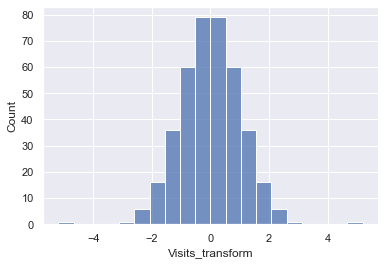

In [126]:
sns.histplot(final_df['Visits_transform'], bins=20);

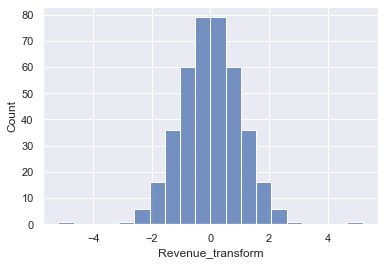

In [128]:
sns.histplot(final_df['Revenue_transform'], bins=20);

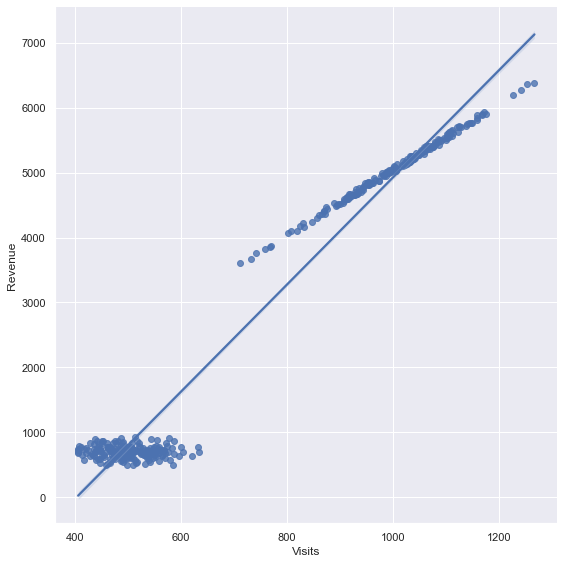

In [129]:
sns.lmplot(x='Visits', y='Revenue', data=final_df, height=8);

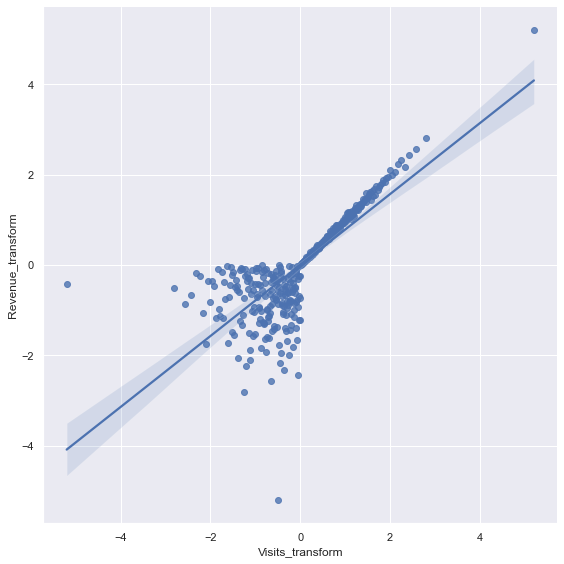

In [130]:
sns.lmplot(x='Visits_transform', y='Revenue_transform', data=final_df, height=8);